In [2]:
import pandas as pd

df = pd.read_csv('wine_data.csv')

print(df.head())
print(df.dtypes) 

print(df.describe())
print(df['ash'].value_counts()) 

   Unnamed: 0  alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  \
0           0    14.23        1.71  2.43               15.6      127.0   
1           1    13.20        1.78  2.14               11.2      100.0   
2           2    13.16        2.36  2.67               18.6      101.0   
3           3    14.37        1.95  2.50               16.8      113.0   
4           4    13.24        2.59  2.87               21.0      118.0   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   color_intensity   hue  od280/od315_of_diluted_wines  proline  
0             5.64  1.04                          3.92   1065.

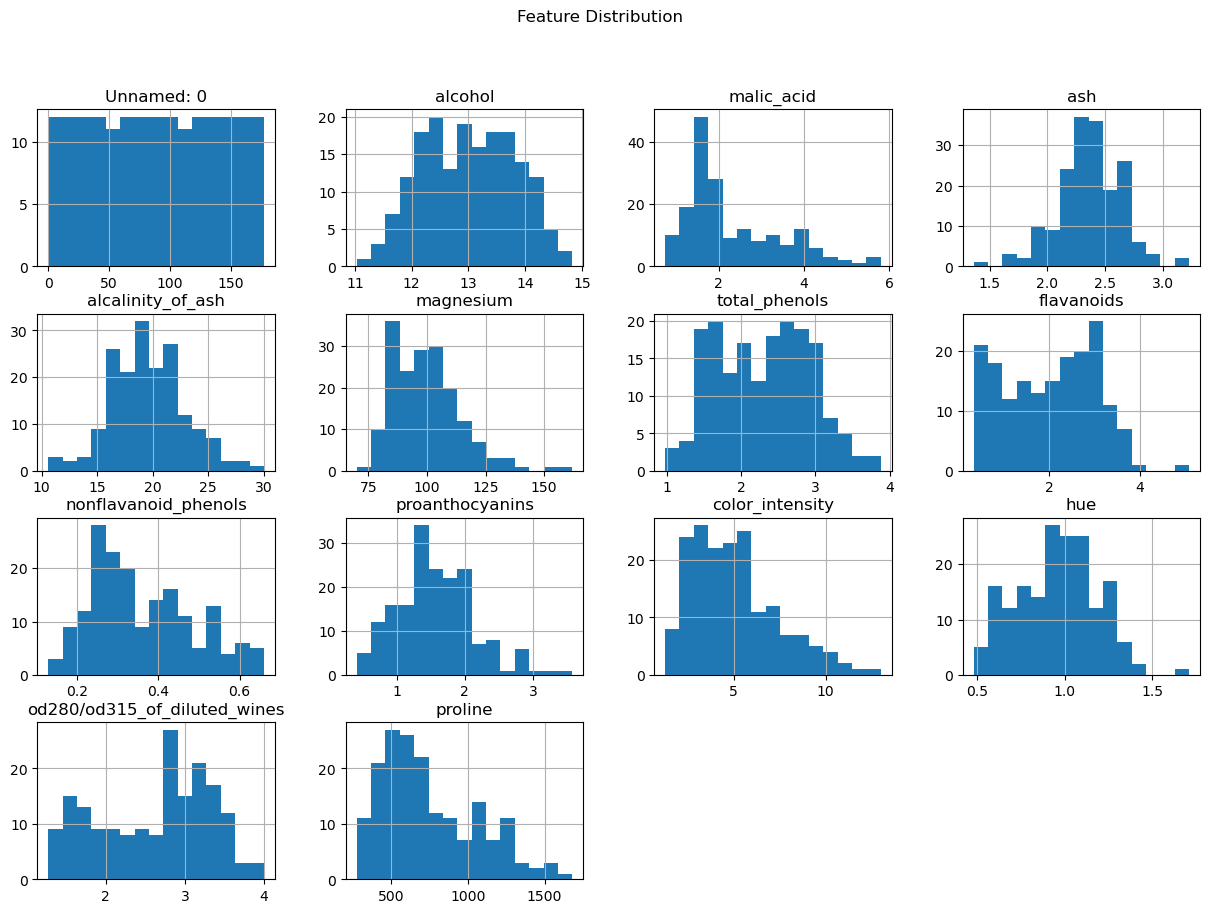

In [7]:
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Feature Distribution')
plt.show()

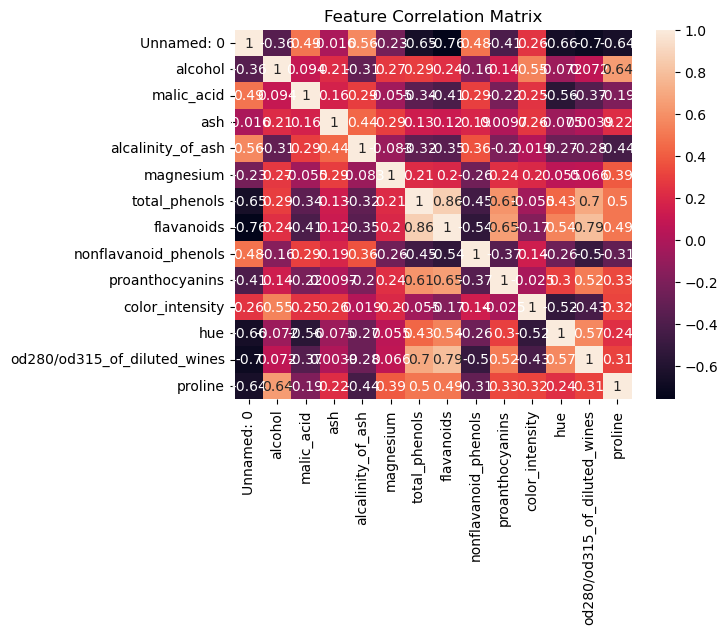

In [8]:
import seaborn as sns
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Feature Correlation Matrix')
plt.show()

In [16]:
y = np.random.randint(0, 2, df.shape[0])

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
probabilities = model.predict_proba(X_test)
log_loss_value = log_loss(y_test, probabilities)
print(f'Log Loss: {log_loss_value}')

Log Loss: 0.7238894050613665


In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

y = np.random.randint(0, 2, df.shape[0])

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test, model.predict(X_test)))

print(confusion_matrix(y_test, model.predict(X_test)))

probabilities = model.predict_proba(X_test)
log_loss_value = log_loss(y_test, probabilities)
print(f'Log Loss: {log_loss_value}')

Accuracy: 0.4444444444444444
              precision    recall  f1-score   support

           0       0.44      0.44      0.44        18
           1       0.44      0.44      0.44        18

    accuracy                           0.44        36
   macro avg       0.44      0.44      0.44        36
weighted avg       0.44      0.44      0.44        36

[[ 8 10]
 [10  8]]
Log Loss: 0.8257360364858899


Training Accuracy: 1.0
Test Accuracy: 0.5104895104895105


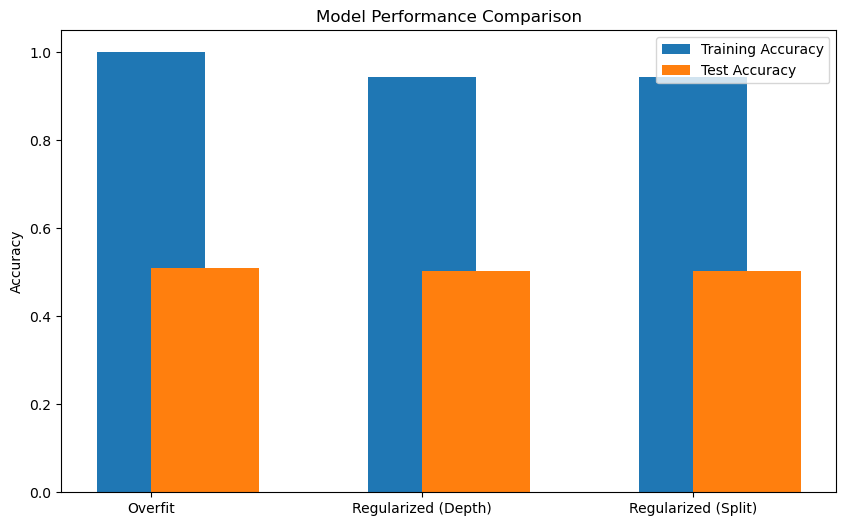

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

y = np.random.randint(0, 2, df.shape[0])

X_train_overfit, X_test, y_train_overfit, y_test = train_test_split(df, y, test_size=0.8, random_state=42)

clf_overfit = DecisionTreeClassifier(random_state=42)
clf_overfit.fit(X_train_overfit, y_train_overfit)

train_accuracy = clf_overfit.score(X_train_overfit, y_train_overfit)
test_accuracy = clf_overfit.score(X_test, y_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')

clf_regularized = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_regularized.fit(X_train_overfit, y_train_overfit)
regularized_train_accuracy = clf_regularized.score(X_train_overfit, y_train_overfit)
regularized_test_accuracy = clf_regularized.score(X_test, y_test)

clf_pruned = DecisionTreeClassifier(min_samples_split=10, random_state=42)
clf_pruned.fit(X_train_overfit, y_train_overfit)
pruned_train_accuracy = clf_pruned.score(X_train_overfit, y_train_overfit)
pruned_test_accuracy = clf_pruned.score(X_test, y_test)

methods = ['Overfit', 'Regularized (Depth)', 'Regularized (Split)']
train_accuracies = [train_accuracy, regularized_train_accuracy, pruned_train_accuracy]
test_accuracies = [test_accuracy, regularized_test_accuracy, pruned_test_accuracy]

x = range(len(methods))
plt.figure(figsize=(10, 6))
plt.bar(x, train_accuracies, width=0.4, label='Training Accuracy', align='center')
plt.bar(x, test_accuracies, width=0.4, label='Test Accuracy', align='edge')
plt.xticks(x, methods)
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.legend()
plt.show()

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

clf_overfit = DecisionTreeClassifier(random_state=42)
clf_overfit.fit(X_train, y_train)

train_accuracy_overfit = clf_overfit.score(X_train, y_train)
test_accuracy_overfit = clf_overfit.score(X_test, y_test)

In [24]:
clf_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_pruned.fit(X_train, y_train)

train_accuracy_pruned = clf_pruned.score(X_train, y_train)
test_accuracy_pruned = clf_pruned.score(X_test, y_test)

In [25]:
print("Without Pruning:")
print(f"Training Accuracy: {train_accuracy_overfit}")
print(f"Test Accuracy: {test_accuracy_overfit}")

print("\nWith Pruning:")
print(f"Training Accuracy: {train_accuracy_pruned}")
print(f"Test Accuracy: {test_accuracy_pruned}")

Without Pruning:
Training Accuracy: 1.0
Test Accuracy: 0.4166666666666667

With Pruning:
Training Accuracy: 0.7253521126760564
Test Accuracy: 0.4444444444444444
